In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Information.csv",encoding="latin1") #Reading dataset

In [3]:
print(df['description'][1])             #reading column description

I'm the author of novels filled with family drama and romance.


In [4]:
print(df.head())                  
print(df.columns)                     #Analyzing the data set

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created  ...                                       profileimage  \
0    12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...  

In [5]:
print(df.shape)
df=df[df['gender:confidence']==1]  #considering rows with gender:confidence=1
print(df.shape)

(20050, 26)
(13926, 26)


In [6]:
df.duplicated().sum() #checking for duplicate values in dataset

0

In [7]:
df['gender'].value_counts() #checking number of males,females,brands

female     5367
male       4653
brand      3784
unknown     122
Name: gender, dtype: int64

Number of gender types in Column Gender 

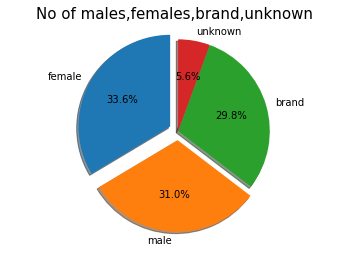

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'female', 'male', 'brand', 'unknown' 
sizes = [6700, 6194, 5942, 1117]
explode = (0.1, 0.1, 0, 0)  # only "explode" the 1st and 2nd slice (i.e. 'Females','Males')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('No of males,females,brand,unknown',fontsize=15)
plt.show()

**Independent Variables= 'Description','Text','Tweet_id','unit_id','sidebar_color','golden','retweet counter' etc**

**Dependent Variables='gender'**

In [9]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)


**Data PreProcessing**

In [10]:
df = df.dropna(subset=['gender:confidence'])       #dropping null values from gender:confidence
df = df.dropna(subset=['description'])             #dropping null values from description  
df = df.dropna(subset=['gender'])                  #dropping null values from gender 

In [11]:
print(df['description'].shape)                     #checking the shape of the columns
print(df['gender:confidence'].shape)
print(df['gender'].shape)

(11845,)
(11845,)
(11845,)


In [12]:
df.isnull().sum()                               #finding the sum of null values for each column

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           27
gender                       0
gender:confidence            0
profile_yn                   0
profile_yn:confidence        0
created                      0
description                  0
fav_number                   0
gender_gold              11818
link_color                   0
name                         0
profile_yn_gold          11818
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              11720
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            3082
user_timezone             3612
dtype: int64

In [13]:
df['gender:confidence'].values

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
#Creating new dataframe called work_data and selecting only the required columns for classification
work_data = pd.DataFrame()
work_data["tweet"] = df.description
work_data["gender"] = df.gender
work_data["confidence"]=df['gender:confidence']

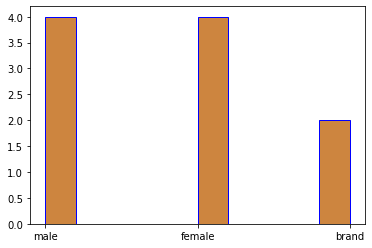

In [15]:
plt.hist(work_data['gender'][:10],facecolor='peru',edgecolor='blue',bins=10)
plt.show()

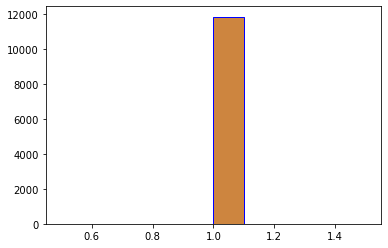

In [16]:
plt.hist(work_data['confidence'],facecolor='peru',edgecolor='blue',bins=10)
plt.show()                                    #since we have only considered gender confidence with 1

In [17]:
work_data.head()

,tweet,gender,confidence
0,i sing my own rhythm.,male,1.0
1,I'm the author of novels filled with family dr...,male,1.0
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",male,1.0
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,female,1.0
5,you don't know me.,female,1.0


In [18]:
get_female = work_data["gender"] == "female"          #collecting data of only gender 'female'
get_male = work_data["gender"] == "male"               #collecting data of only gender 'male'
get_brand = work_data["gender"] == "brand"             #collecting data of only 'brands

In [19]:
female_rows = work_data[get_female]
male_rows = work_data[get_male]
brand_rows = work_data[get_brand]

In [20]:
#printing tweet counts of male,female and brand
print("total female tweets: ",female_rows.tweet.count())
print("total male tweets:   ",male_rows.tweet.count())
print("total brand tweets:  ",brand_rows.tweet.count())

total female tweets:  4616
total male tweets:    4150
total brand tweets:   3007


Tweet Count by all Gender types

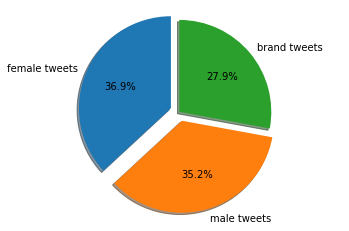

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'female tweets', 'male tweets', 'brand tweets'
sizes = [5725, 5469, 4328]
explode = (0.1, 0.1, 0)  # only "explode" the 1st and 2nd slice (i.e. 'Females','Males')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [22]:
work_data.drop(work_data[work_data['gender']=='brand'].index, inplace = True)  #dropping rows with 'brand' since we need to classify only based only gender 
                                                                               

In [23]:
print(work_data['gender'].shape)

(8838,)


Labelling

In [24]:
female_rows.gender = 0     
male_rows.gender = 1       
# brand_rows.gender = 2

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Concating the brand and person rows

In [25]:
frames = [female_rows, male_rows]
data = pd.concat(frames,ignore_index=True)

In [26]:
data.describe()

,gender,confidence
count,8766.000000,8766.0
mean,0.473420,1.0
std,0.499321,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,0.000000,1.0
75%,1.000000,1.0
max,1.000000,1.0


In [27]:
data.tail()

,tweet,gender,confidence
8761,Amicable IT person. Self indulgent writer. Som...,1,1.0
8762,"Typographer and typographic consultant, co-fou...",1,1.0
8763,"Head Chef, Chez Bruce. Loves Cars and Bicycles...",1,1.0
8764,"Whatever you like, it's not a problem at all. ...",1,1.0
8765,#TeamBarcelona ..You look lost so you should f...,1,1.0


In [28]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       8766 non-null   object 
 1   gender      8766 non-null   int64  
 2   confidence  8766 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.6+ KB


In [29]:
#Checking for Null values again
data.dropna(inplace=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       8766 non-null   object 
 1   gender      8766 non-null   int64  
 2   confidence  8766 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 273.9+ KB


Natural Language Processing

In [30]:
#Importing regular expression and Natural language processing
import re
import nltk as nlp

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
lemma = nlp.WordNetLemmatizer()

In [32]:
tweets_list = []          
for each in data.tweet:
    each = re.sub("[^a-zA-Z]"," ", str(each))                 # to clean unnecesarry chars
    each = each.lower()                                       # lowercase all
    each = nlp.word_tokenize(each)                                                   # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words from your array
    each = [lemma.lemmatize(word) for word in each]                                 
    each = " ".join(each)                                                            # make them one string again
    tweets_list.append(each)                                         # put them into big array# put them into big array

In [33]:
#Printing 'before cleaning' and 'after cleaning' text
print("Original version: ", data.tweet.iloc[2174])
print("New version:      ", tweets_list[2174])

Original version:  AK 2017||
New version:       ak


In [34]:
print(tweets_list[:5])

['ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx', 'know', 'pll fan crazy mcd ramen bae', 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow', 'jmkm']


In [35]:
#Importing Count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets_list)
print(vectorizer.get_feature_names())

['aa', 'aacc', 'aalaniannmariemorrison', 'aall', 'aamu', 'aan', 'aarhus', 'aaron', 'aarpsocial', 'aastatechamp', 'aau', 'ab', 'aba', 'abandon', 'abantu', 'abba', 'abbey', 'abbeypeterson', 'abbott', 'abc', 'abcdelenuhh', 'abcreligion', 'abdulla', 'abeautifulmess', 'aberdeen', 'abergwaun', 'aberration', 'abetting', 'abfak', 'abiding', 'abigail', 'ability', 'abioticfl', 'abit', 'able', 'abm', 'aboki', 'abolish', 'abphotography', 'abr', 'abracadabra', 'abrahamers', 'absence', 'absolute', 'absolutely', 'absolutly', 'absorb', 'absoultely', 'abstained', 'abstract', 'abstraction', 'absurd', 'absurdity', 'abt', 'abu', 'abulala', 'abundance', 'abundant', 'abusado', 'abuse', 'abused', 'abusing', 'abyss', 'ac', 'acaben', 'acaciabrinley', 'acad', 'academic', 'academy', 'acads', 'acbj', 'acc', 'accelerator', 'accent', 'accenturedigi', 'accept', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accessory', 'accident', 'accidental', 'acclaimed', 'accomplish', 'accomplished', 'accomplishment

In [36]:
print(X.shape)
print(type(X))

(8766, 18811)
<class 'scipy.sparse.csr.csr_matrix'>


In [37]:
#Importing Count vectorizer and selecting maximum features=3000
from sklearn.feature_extraction.text import CountVectorizer

max_features = 3000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(tweets_list).toarray()  #Storing the transformed tweet list in a sparce matrix
words = count_vectorizer.get_feature_names()

In [38]:
print("Most used 3000 words on all tweets (alphabetically first 100) :", words[:100])

Most used 3000 words on all tweets (alphabetically first 100) : ['aa', 'abc', 'absolutely', 'ac', 'academic', 'academy', 'acc', 'accept', 'accident', 'account', 'accountant', 'achieve', 'act', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'add', 'addict', 'addicted', 'addiction', 'admin', 'administrator', 'adore', 'adult', 'advance', 'adventure', 'adventurer', 'adventurous', 'advertising', 'advice', 'adviser', 'advisor', 'advocate', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'aficionado', 'afraid', 'africa', 'african', 'afro', 'ag', 'age', 'agency', 'agent', 'agile', 'ah', 'ahead', 'ahs', 'aint', 'air', 'airplane', 'aka', 'al', 'album', 'ale', 'alex', 'alien', 'alive', 'alliance', 'alot', 'alpha', 'alright', 'alternative', 'alum', 'alumna', 'alumnus', 'amateur', 'amazing', 'amazon', 'ambassador', 'america', 'american', 'amo', 'amor', 'amy', 'analysis', 'analyst', 'analytics', 'anchor', 'android', 'andy', 'angel',

**Feature Selection**

In [39]:
y = data.gender.values
x = sparce_matrix
confidence=data.confidence

**Train & Test Split**

In [40]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.15,random_state=42)


In [41]:
train_confidence,test_confidence=train_test_split(confidence,test_size=0.15,random_state=42)
print(train_confidence.shape)
print(train_y.shape)
print(x.shape,y.shape)

(7451,)
(7451,)
(8766, 3000) (8766,)


Normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [43]:
train_y.shape


(7451,)

**ENSEMBLE MODELLING**

**LOGISTIC REGRESSION**

In [52]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.5,multi_class='auto',max_iter=50)
# training Linear Regression model on training data
LogReg.fit(train_x,train_y)


LogisticRegression(C=0.5, max_iter=50)

In [53]:
from sklearn.metrics import confusion_matrix

y_pred = LogReg.predict(test_x)
ypred_prob = LogReg.predict_proba(test_x)
ypred_prob

x_pred=LogReg.predict(train_x)

from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print("Train set Accuracy: ", metrics.accuracy_score(train_y, x_pred))

Test set Accuracy:  0.6707224334600761
Train set Accuracy:  0.8032478861897732


**SUPPORT VECTOR MACHINE** 

In [46]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=3)

svc.fit(train_x, train_y)

SVC(C=3)

In [47]:
y_pred = svc.predict(test_x)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       687
           1       0.64      0.61      0.62       628

    accuracy                           0.65      1315
   macro avg       0.65      0.65      0.65      1315
weighted avg       0.65      0.65      0.65      1315



**MULTINOMIAL NAIVE BAYES**

In [54]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB(alpha=1.0,fit_prior=False)
nv.fit(train_x, train_y)

from sklearn.metrics import accuracy_score
y_pred = nv.predict(test_x)
print("Test Set accuracy:",accuracy_score(test_y, y_pred))

Test Set accuracy: 0.6859315589353612


**Question no. 1 - What are the most common emotion/words used by males and females**

Cleaning Data for EDA

In [55]:
def clean(each):
    each=re.sub("<[^>]*>"," ",each)                      #remove html
    each = re.sub("[^a-zA-Z]"," ", str(each))                # to clean unnecesarry chars
    each=re.sub("https?://[A-Za-z0-9./]+"," ",str(each))      #remove url
    each=re.sub("@[A-Za-z0-9_]+"," ",str(each))              #remove tags          
    each=re.sub("#[A-Za-z0-9_]+"," ",str(each))               #remove hashtags
    each=re.sub("_+"," ",str(each))                           #remove underscore 
    each = each.lower()                                       # lowercase all
    each = nlp.word_tokenize(each)                                                   # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words from your array                               
    each = " ".join(each)                                                            # make them one string again
    return each

In [56]:
df['text2']=df['text'].apply(lambda x: clean(x))      # cleaning the text data 
df['description2']=df['description'].apply(lambda x: clean(x))   # cleaning the description data

In [57]:
dfm=df[(df['gender']=='male') | (df['gender']=='female')]          # Taking only male & female genders
data=df[df['gender:confidence']==1]
data.drop(columns=['gender:confidence'],inplace=True,axis=1)

For Males

In [58]:
m_df = dfm[dfm["gender"]=="male"]
m_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text2,description2
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,robbie e responds critics win eddie edwards wo...,sing rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),felt like friends living story https co arnge ...,author novels filled family drama romance
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,...,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),hi jordanspieth looking url use ifttt typicall...,mobile guy ers shazam google kleiner perkins y...
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0,yes,1.0,12/3/12 21:54,...,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN,gala bingo clubs bought uk largest high street...,secret getting ahead getting started
17,815719243,False,finalized,3,10/26/15 22:50,male,1.0,yes,1.0,10/18/09 11:41,...,C0DEED,@coolyazzy94 Ditto - I'm still learning the fa...,NaN,91,10/26/15 12:40,6.587300e+17,Glasgow,London,coolyazzy ditto still learning favourites retw...,enthusiastic f fan model collector music fan f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,815755689,True,golden,260,NaN,male,1.0,yes,1.0,5/15/09 20:04,...,C0DEED,@legobutts you can do quests and kill stuff wh...,NaN,14165,10/26/15 13:20,6.587400e+17,NaN,Quito,legobutts quests kill stuff wearing mask get c...,amicable person self indulgent writer somehow ...
20037,815756103,True,golden,259,NaN,male,1.0,yes,1.0,11/27/07 13:10,...,FFFFFF,@TrentWalton @oguzbilgic Spell it out in all-c...,NaN,9092,10/26/15 13:19,6.587400e+17,"Brooklyn, NY",Eastern Time (US & Canada),trentwalton oguzbilgic spell caps think may ca...,typographer typographic consultant co founder ...
20043,815756700,True,golden,240,NaN,male,1.0,yes,1.0,9/27/11 0:19,...,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/15 13:19,6.587400e+17,Chertsey Bridge,NaN,game faggot venison loin crisp spelt quince ht...,head chef chez bruce loves cars bicycles food
20046,815757681,True,golden,248,NaN,male,1.0,yes,1.0,8/15/12 21:17,...,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN,greg hardy good player get face dez bryant lea...,whatever like problem chargernation foreverroy...


In [59]:
common_words_m=[]
msgs=list(m_df['text2'])              # calculating most common words by males 
for msg in msgs: 
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        common_words_m.append(word)

In [60]:
cm = pd.Series(common_words_m)

In [61]:
val=pd.value_counts(cm.values.flatten())                     #to get copy of given array in one dimension

In [62]:
mdf=pd.DataFrame(val,columns=['common words count'])          #the male dataframe

In [63]:
mdf[:5]

,common words count
co,1350
https,1341
like,250
get,231
one,183


In [64]:
words=list(mdf.index)                             
no=list(mdf['common words count'])                #number of times each word has occured

In [65]:
mw_df=pd.DataFrame({'Word':words,'Occurrence':no})
mw_df[:10]

,Word,Occurrence
0,co,1350
1,https,1341
2,like,250
3,get,231
4,one,183
5,time,167
6,new,147
7,go,136
8,people,134
9,love,133


The Most common words used by Males and their occurrence

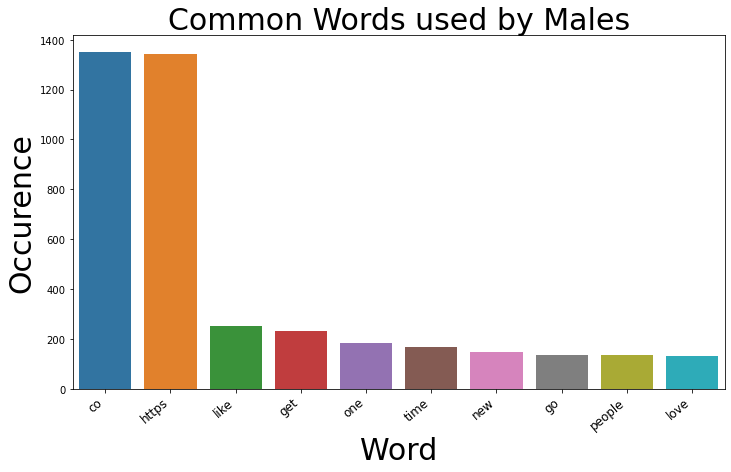

In [66]:
plt.figure(figsize = (10,6))
#plots a bar plot for common words used by males
ax=sns.barplot(x = 'Word' , y = 'Occurrence', data =mw_df[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
plt.tight_layout()
plt.xlabel('Word' , fontsize = 30)
plt.ylabel('Occurence' , fontsize = 30)
plt.title('Common Words used by Males',fontsize = 30)
plt.show()

For Females

In [67]:
f_df = dfm[dfm["gender"]=="female"]
f_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text2,description2
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),ive seen people train lamps chairs tvs etc htt...,know
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0,yes,1.0,9/8/15 4:50,...,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN,aphmau pic defines mcd fangirls fanboys mcd sh...,pll fan crazy mcd ramen bae
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0,yes,1.0,5/13/11 3:32,...,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam,evielady lovely tree year never seen gorgeous ...,renaissance art historian university nottingha...
16,815719242,False,finalized,3,10/26/15 23:43,female,1.0,yes,1.0,8/27/11 9:42,...,EEEEEE,@giannaaa28 lmao _Ù÷â_Ù÷â dude I'm hella scare...,NaN,16627,10/26/15 12:40,6.587300e+17,NaN,Arizona,giannaaa lmao dude hella scared next episode b...,jmkm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20035,815755887,True,golden,270,NaN,female,1.0,yes,1.0,5/14/10 9:44,...,FFFFFF,Beetlejuice is the perfect Halloween movie!!!!...,NaN,7004,10/26/15 12:39,6.587300e+17,"Raleigh, North Carolina",Atlantic Time (Canada),beetlejuice perfect halloween movie beetlejuic...,love friends family color pink mkto followed h...
20039,815756332,True,golden,227,NaN,female,1.0,yes,1.0,2/21/12 18:36,...,C0DEED,Especially when all you do is the best you can...,NaN,2034,10/26/15 12:39,6.587300e+17,NaN,NaN,especially best still get shit,find wild things
20044,815756767,True,golden,227,NaN,female,1.0,yes,1.0,6/11/14 1:55,...,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.587400e+17,NaN,NaN,need ride home practice raining hard asf,love
20045,815757572,True,golden,259,NaN,female,1.0,yes,1.0,8/5/15 21:16,...,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN,lookupondeath fine drink tea love,rp


In [68]:
common_words_f=[]
msgs=list(f_df['text2'])              # calculating most common words by females 
for msg in msgs: 
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        common_words_f.append(word)

In [69]:
cm1 = pd.Series(common_words_f)

In [70]:
val1=pd.value_counts(cm1.values.flatten())                        #to get copy of given array in one dimension

In [71]:
fdf=pd.DataFrame(val1,columns=['common words count'])             #the female dataframe

In [72]:
fdf[:5]

,common words count
co,1380
https,1375
like,303
get,269
one,236


In [73]:
words=list(fdf.index)
no=list(mdf['common words count'])          #number of times each word has occuredno=list(fdf['common words count'])                 

In [74]:
fw_df=pd.DataFrame({'Word':words,'Occurrence':no})
fw_df[:10]

,Word,Occurrence
0,co,1380
1,https,1375
2,like,303
3,get,269
4,one,236
5,love,231
6,day,222
7,go,196
8,people,181
9,time,174


The Most common words used by Females and their occurrence

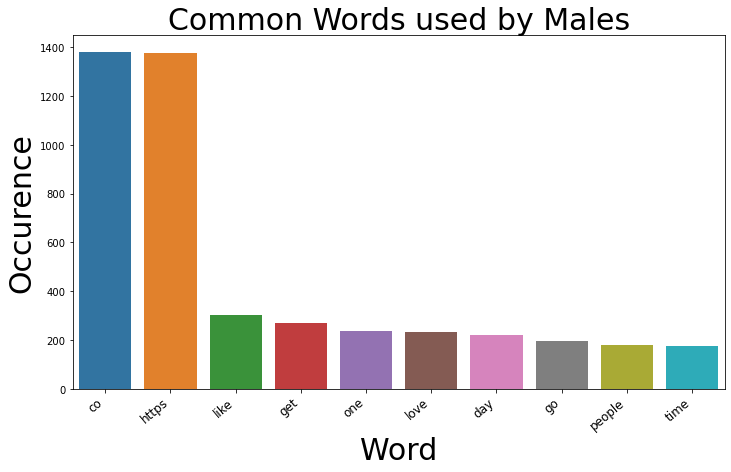

In [75]:
plt.figure(figsize = (10,6))
#plots a bar plot for common words used by females
ax=sns.barplot(x = 'Word' , y = 'Occurrence', data =fw_df[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
plt.tight_layout()
plt.xlabel('Word' , fontsize = 30)
plt.ylabel('Occurence' , fontsize = 30)
plt.title('Common Words used by Males',fontsize = 30)
plt.show()

**Question 2 - Which gender makes more typos in their tweet?**

In [76]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [77]:
#Importing SpellChecker package
from spellchecker import SpellChecker
spell=SpellChecker()
male_typos=spell.unknown(common_words_m)
female_typos=spell.unknown(common_words_f)

In [78]:
len(male_typos)  #length of male typos

5637

In [79]:
print(type(male_typos))

<class 'set'>


In [80]:
list_1=list(male_typos)
print(type(list_1))
list_1    #list of male typos

<class 'list'>


['wpbrqhvw',
 'blogging',
 'thatslvni',
 'nydailynews',
 'adrianteakdesk',
 'yguk',
 'wedigmondays',
 'kupkakke',
 'ipo',
 'tweeting',
 'cartercruise',
 'fzjwzpdf',
 'musicsgf',
 'alpacino',
 'birthdaybingong',
 'lsfkkrx',
 'paddyholohanmma',
 'oyexsf',
 'ikb',
 'episodio',
 'heis',
 'aky',
 'zkmt',
 'rnb',
 'mishas',
 'surlyraccoon',
 'ruw',
 'xokedj',
 'snjwuz',
 'jjntzoagau',
 'kylekulinski',
 'antoniospadaro',
 'afrikan',
 'britney',
 'afteribiza',
 'bostonravenfans',
 'pablito',
 'llf',
 'dontmissit',
 'wcw',
 'cwellssun',
 'habana',
 'lolol',
 'atwvvuztzl',
 'darlingdarla',
 'whatsapp',
 'bgi',
 'scarfs',
 'thn',
 'djlnf',
 'typos',
 'oucbc',
 'wx',
 'fandom',
 'yhiodlmsq',
 'mariadevereux',
 'tcus',
 'weah',
 'svjmmyklzs',
 'everythin',
 'prepping',
 'hashtags',
 'bxtalv',
 'opelikacreek',
 'quevergonha',
 'xvmd',
 'edja',
 'lgxt',
 'fixate',
 'wvvvxs',
 'cavs',
 'gazcook',
 'gtvm',
 'siwel',
 'turnup',
 'beachamp',
 'barca',
 'mariah',
 'alexandrajonson',
 'glowforge',
 'konje'

In [81]:
len(female_typos)     #length of female typos   

5278

**Answer : Males have 5637 typos while females have 5278 typos Therefore, Males made more typos than Females**

In [82]:
list_2=list(female_typos)
print(type(list_2))
list_2    #list of female typos       

<class 'list'>


['blogging',
 'xobnhww',
 'seane',
 'karlaaa',
 'gnufvnu',
 'jennydanker',
 'manita',
 'tweeting',
 'yrv',
 'pvm',
 'nwixepze',
 'toxicwhisper',
 'magicalfeyfenny',
 'juscallmewill',
 'ymj',
 'mfqwytfg',
 'zdihnbal',
 'rghcfx',
 'isabelpascual',
 'saraix',
 'lawtonpiercer',
 'asapscience',
 'lscomh',
 'sanfran',
 'rthfumq',
 'mondayblues',
 'qxtg',
 'whb',
 'moedshaw',
 'onision',
 'empoweringmamas',
 'somewhatsurreal',
 'inriwzxezs',
 'vbnna',
 'knowin',
 'sammich',
 'joshuadun',
 'afrikan',
 'xhixtmtbm',
 'edcampos',
 'bitchimmikeb',
 'zj',
 'faucetunicorn',
 'woc',
 'llf',
 'iambella',
 'sxnnyy',
 'lolol',
 'elebpcirpa',
 'dhjo',
 'ttall',
 'unleashyourinnerbear',
 'shortsleeve',
 'lincshour',
 'whatsapp',
 'applecrisp',
 'bff',
 'travelers',
 'advaita',
 'typos',
 'alexanders',
 'riverroaming',
 'lifefoodawards',
 'fandom',
 'jpf',
 'ownnnn',
 'lalo',
 'dietcoke',
 'overwriting',
 'bwss',
 'karlie',
 'pedi',
 'richardfpenn',
 'eponas',
 'klobo',
 'trynagetdakey',
 'sicef',
 'mua',


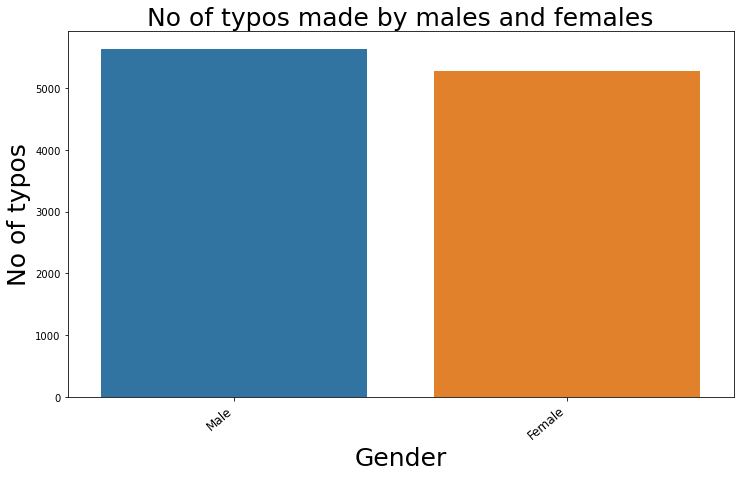

In [83]:
plt.figure(figsize=(10,6))
Gender=['Male','Female']
#plots a bar plot for length of typos used by males and females
typos_ct=[len(male_typos),len(female_typos)]
ax=sns.barplot(x=Gender,y=typos_ct)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=12)
plt.tight_layout()
plt.xlabel('Gender',fontsize=25)
plt.ylabel('No of typos',fontsize=25)
plt.title('No of typos made by males and females',fontsize=25)
plt.show()

**THANK YOU**